In [20]:
! pip install nltk

In [21]:
! pip install GetOldTweets3

In [22]:
import string
from collections import Counter
import matplotlib.pyplot as plt

In [23]:
def get_tweets():
    import GetOldTweets3 as got # library used to scrap the data from twitter 
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('Coronavirus') \
        .setSince("2020-01-01") \
        .setUntil("2020-01-31") \
        .setMaxTweets(100)
        
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets
         
    

In [24]:
# reading the text_file

text = ""

text_tweets = get_tweets()
length = len(text_tweets)

for i in range(0 , length):
    text  = text_tweets[i][0] + " " + text
    
# converting to lower case
lower_case = text.lower()

# remove puctuation

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words

tokenized_words = cleaned_text.split()

In [25]:
text_tweets

[['my little sister was throwing up and we’re here clowning her saying she got corona virus '],
 ['This shit must cure the coronavirus '],
 ['Hala gapo ta singkit nakun adda kano coronavirus kn'],
 ['It seems that the shortage of masks continues in Japan due to the influence of the new coronavirus Peak seems to be around March, so please stay out as much as possible'],
 ['Update: Coronavirus death toll in China now 213 nationwide, with 204 in Hubei Province, state media reports https://www.weibo.com/2803301701/IrZeE0L5l?refer_flag=1001030103_'],
 ['we really should stop making jokes about corona virus. and to those people who spreading fake news, you are the virus. #coronavirus'],
 ["South China Morning Post Coronavirus Update 9480 confirmed 'cases' 213 confirmed deaths #WuhanAcuteRespiratorySyndrome #CoronaVirus #WuhanFlu #2019nCoV #nCoV2019 #nCoV https://multimedia.scmp.com/widgets/china/wuhanvirus/"],
 ['Chinese journalist says Wuhan hospitals are running out of beds and coronavirus

In [27]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
emotion_list = []
with open('emotions.txt', 'r' ) as file:
    for line in file:
        clear_lines = line.replace('\n', '').replace(',','').replace("'", '').strip()
        word , emotion = clear_lines.split(':')
        if word in final_words:
            emotion_list.append(emotion)
            
w = Counter(emotion_list)
print(w)

Counter({' happy': 2, ' average': 1, ' attracted': 1, ' lost': 1, ' surprise': 1, ' loved': 1})


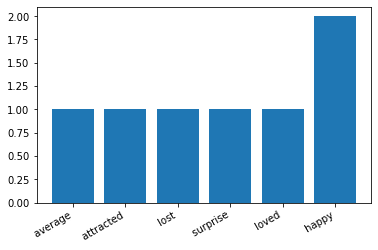

In [29]:
fig , ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()